<a href="https://colab.research.google.com/github/tinaj-gupta/Counterfiet-Product-Recognition/blob/master/PCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install --upgrade scikit-image

In [ ]:
#pip install --upgrade imutils

In [ ]:
#from __future__ import print_function
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import compare_ssim
import argparse
import imutils
from google.colab.patches import cv2_imshow

In [ ]:
def imageMatcher(original , edited) :
  #print('inside',original.dtype())
  #cv2.imread(original)
  try:
      imgOrg  = cropImages(original)
      template = cropImages(edited)
      #img2  = cv2.imread(img,0)
      #temp2 = cv2.imread(template,0)
      cv2_imshow(imgOrg)
      cv2_imshow(template)
  except IOError as e:
      print("({})".format(e))
  else:
      img2 = imgOrg.copy()
      print(template.shape)
      w, h = template.shape[:-1]
      #w, h = template.shape
      #print('w:h',w,h)
      #print()
      #print(imgOrg.shape)
  # All the 6 methods for comparison in a list
  methods = ['cv2.TM_CCOEFF_NORMED']

  """ methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'] """

  if(template.shape!=imgOrg.shape):
    for meth in methods:
        img = img2.copy()
        method = eval(meth)

        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        """print("Method: %s" , meth)
        print("min_val: " , min_val)
        print("max_val: " , max_val)
        print("min_loc: " , min_loc)
        print("max_loc: " , max_loc)"""

        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        """print('top_left[1]',top_left[1])
        print('top_left[0]',top_left[0])
        print('bottom_right[1]',bottom_right[1])
        print('h',h)
        print('w',w)"""
        #cv2.rectangle(img,top_left, bottom_right, 255, 2)
        imgX  = img
        box = imgX[top_left[1]:top_left[1]+w,top_left[0]:top_left[0]+h]
        #box = imgX[0:61 ,0:118]
        imgOrg = box
        #crop_img = img[0:393, 299:583]
        #box[1:394,0:693]
        #cv2_imshow(box)
        #cv2_imshow(template)
      #cv2.imwrite(r'./Test_gray.jpg', box)
  matchImage(imgOrg,template)
  cv2.waitKey(0)

In [ ]:
def matchImage(Original,Edited):
  # load the two input images
  #imageA = cv2.imread(r'/content/test2.png')
  #cv2_imshow(Original)
  imageA = Original
  imageB = Edited
  #print (imageA.shape)
  #print (imageB.shape)
  #diff = cv2.subtract(imageA ,imageB)
  #cv2_imshow(diff)
  img_rgbA = np.array(imageA, dtype=np.uint8)
  img_rgbB = np.array(imageB, dtype=np.uint8)
  # convert the images to grayscale
  grayA = cv2.cvtColor(img_rgbA, cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(img_rgbB, cv2.COLOR_BGR2GRAY)
  # compute the Structural Similarity Index (SSIM) between the two
  # images, ensuring that the difference image is returned
  (score, diff) = compare_ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")
  print("SSIM: {}".format(score))
  # threshold the difference image, followed by finding contours to
  # obtain the regions of the two input images that differ
  if score < 0.99 :
    thresh = cv2.threshold(diff, 0, 255,
      cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
      cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    # loop over the contours
    for c in cnts:
      # compute the bounding box of the contour and then draw the
      # bounding box on both input images to represent where the two
      # images differ
      (x, y, w, h) = cv2.boundingRect(c)
      cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 10, 255), 2)
      cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 30, 255), 2)
    
  # show the output images
  #cv2_imshow(imageA)
  #cv2_imshow(imageB)
  #cv2_imshow(diff)
  #cv2_imshow(thresh)
  cv2.waitKey(0)

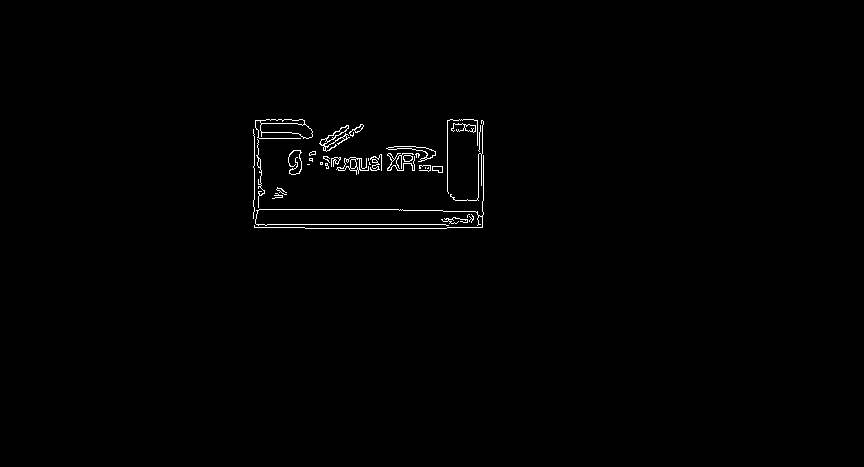

254 155 230 74


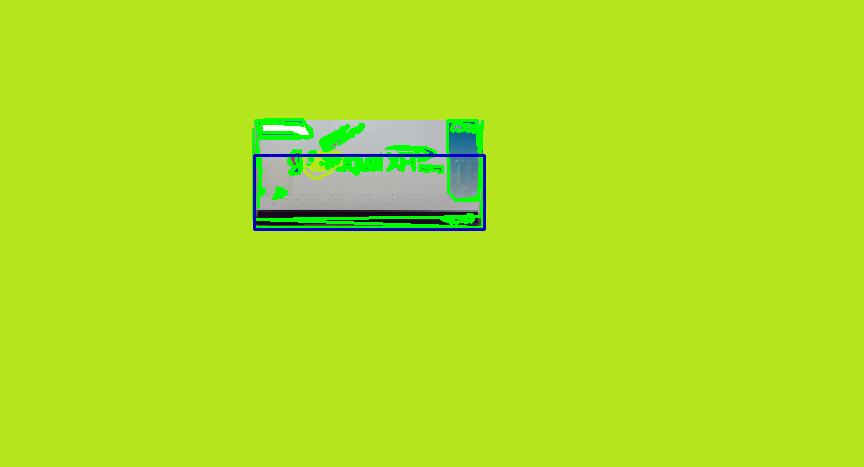

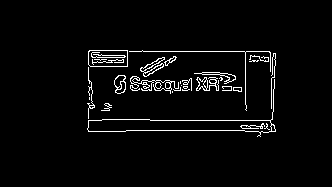

87 79 189 58


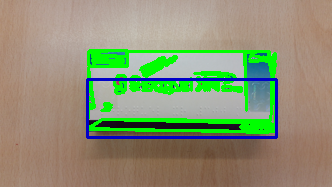

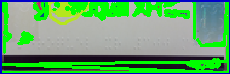

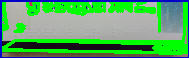

(58, 189, 3)
(74, 230, 3)
SSIM: 0.4909979501549666


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
imageMatcher('SeroquelXR1.png','SeroquelXR.png')

In [ ]:
imageMatcher('/content/DSRT0761-Grief-v01.jpg','/content/template2.jpg')

In [ ]:
import cv2

def cropImages(imageA) :
  #reading the image 
  image = cv2.imread(imageA)
  #image = cv2.imread("/content/PharmaPack_R_I_S1_Ph1_P0016_D01_S001_C2_F1.png")
  # Grayscale 
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    
  # Find Canny edges 
  edged = cv2.Canny(gray, 10, 250) 
  #cv2_imshow(edged)
  #cv2.waitKey(0)
  #ret,thresh = cv2.threshold(gray,127,255,0)
  #applying closing function 
  #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
  #closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
  #cv2_imshow(closed)
  #cv2.waitKey(0)
  
  #finding_contours 
  (cnts,_) = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  #cnts = imutils.grab_contours(cnts)
  mx = (0,0,0,0)      # biggest bounding box so far
  mx_area = 0 
  for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    #peri = cv2.arcLength(c, True)
    #approx = cv2.approxPolyDP(c, 0.2 * peri, True)
    #cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
    #cv2_imshow(image)
    area = w*h
    print('aaa' ,area)
    #print(x,y,w,h)
    #cv2_imshow(image[y:y+h,x:x+w])
    if area > mx_area:
        mx = x,y,w,h
        #print(x,y,w,h)
        mx_area = area
        print('mxx' , mx_area)
        print('x,y,..' ,mx)

  x,y,w,h = mx
  print('x,y,.finall.' ,mx)
  print('final',mx_area)
  #print(x,y,w,h)
  # Output to files
  roi=image[y:y+h,x:x+w]
  #cv2_imshow(image[y:y+h,x:x+w])
  
  #cv2.rectangle(image,(x,y),(x+w,y+h),(200,0,0),2)
  cv2_imshow(roi)
  cv2.waitKey(0)
  return roi;

aaa 62084
mxx 62084
x,y,.. (0, 0, 332, 187)
x,y,.finall. (0, 0, 332, 187)
final 62084


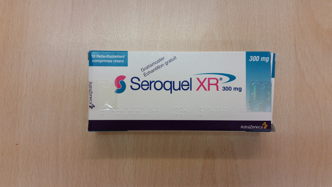

array([[[121, 145, 176],
        [130, 150, 177],
        [130, 149, 177],
        ...,
        [118, 140, 170],
        [113, 137, 168],
        [118, 141, 171]],

       [[121, 147, 176],
        [123, 145, 174],
        [129, 149, 176],
        ...,
        [116, 138, 168],
        [119, 141, 169],
        [126, 146, 174]],

       [[125, 147, 175],
        [121, 141, 171],
        [128, 150, 178],
        ...,
        [116, 140, 167],
        [120, 142, 170],
        [124, 144, 169]],

       ...,

       [[111, 133, 162],
        [113, 134, 163],
        [120, 138, 165],
        ...,
        [116, 133, 160],
        [116, 132, 160],
        [118, 134, 161]],

       [[110, 132, 162],
        [111, 133, 162],
        [113, 135, 163],
        ...,
        [117, 133, 159],
        [116, 134, 160],
        [120, 135, 160]],

       [[113, 134, 161],
        [115, 135, 163],
        [112, 133, 162],
        ...,
        [116, 133, 159],
        [119, 134, 161],
        [123, 138, 164]]

In [ ]:
cropImages('/content/SeroquelXR.png')

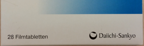

-1

In [ ]:
import cv2 
image = cv2.imread("/content/Ometec.png")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(image, 10, 250)
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
idx = 0
mx=(0,0,0,0)
mx_area = 0
for c in cnts:
  x,y,w,h = cv2.boundingRect(c)
  area = w*h
  #print('aaa' ,area)
  if area > mx_area:
      mx = x,y,w,h
      mx_area = area
      #print('mxx' , mx_area)
      #print('x,y,..' ,mx)	

x,y,w,h = mx
#print('x,y,.finall.' ,mx)
#print('final',mx_area)
#print(x,y,w,h)
# Output to files
roi=image[y:y+h,x:x+w]
#cv2_imshow(image[y:y+h,x:x+w])

#cv2.rectangle(image,(x,y),(x+w,y+h),(200,0,0),2)
cv2_imshow(roi)	
cv2.waitKey(0)